In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
d_data = pd.read_csv("deliveries.csv")
#df = pd.read_excel("C:\Users\Shilpa\OneDrive\Desktop\Documents\symb\python\car.csv")
m_data = pd.read_csv("matches.csv")

In [4]:
def name_changer(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data 

In [4]:
#Applying changes to matches dataset

m_data['team2']=m_data['team2'].apply(lambda x:name_changer(x))
m_data['team1']=m_data['team1'].apply(lambda x:name_changer(x))

m_data['toss_winner']=m_data['toss_winner'].apply(lambda x:name_changer(x))

 
#Applying changes to deliveries dataset
d_data['batting_team']=d_data['batting_team'].apply
(lambda x:name_changer(x))
d_data['bowling_team']=d_data['bowling_team'].apply
(lambda x:name_changer(x))

<function __main__.<lambda>(x)>

Now lets see if the changes are applied successfully

In [5]:
m_data.team1.unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [8]:
m_data.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions',
'Royal Challengers Bangalore','Kolkata Knight Riders', 'Kings XI Punjab',
'Chennai Super Kings' ,'Rajasthan Royals' ,'Kochi Tuskers Kerala' ,
'Rising Pune Supergiants','Delhi Capitals']
,['SRH','MI','GL','RCB','KKR','KXIP','CSK','RR','KTK','RPS', 'DC'],inplace=True)

d_data.replace(['Sunrisers Hyderabad', 'Mumbai Indians' ,'Gujarat Lions',
'Royal Challengers Bangalore','Kolkata Knight Riders', 'Kings XI Punjab',
'Chennai Super Kings' ,'Rajasthan Royals' ,'Kochi Tuskers Kerala' , 
'Rising Pune Supergiants','Delhi Capitals']
,['SRH','MI','GL','RCB','KKR','KXIP','CSK','RR','KTK','RPS', 'DC'],inplace=True)


In [9]:
m_data.sample()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
425,426,2013,Pune,2013-05-02,RCB,Pune Warriors,RCB,bat,normal,0,RCB,17,0,AB de Villiers,Subrata Roy Sahara Stadium,Aleem Dar,C Shamshuddin,NaN


In [10]:
d_data.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
72191,306,2,MI,RCB,15,5,SL Malinga,R Sathish,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
141126,597,1,MI,KXIP,9,6,AT Rayudu,PA Patel,P Sahu,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


Dropping umpires columns 


In [11]:
m_data = m_data.drop(columns=["umpire1","umpire2","umpire3"],axis =1)

m_data["city"].fillna("Not known",inplace=True)
m_data["winner"].fillna("Not known",inplace=True)
m_data["player_of_match"].fillna("Not known",inplace=True)


In [12]:
m_data.winner.value_counts()
 

MI                        92
CSK                       79
KKR                       77
RCB                       73
KXIP                      70
RR                        63
Delhi Daredevils          62
SRH                       42
Deccan Chargers           29
GL                        13
Pune Warriors             12
Rising Pune Supergiant    10
KTK                        6
RPS                        5
Not known                  3
Name: winner, dtype: int64

2) Top Match Winners


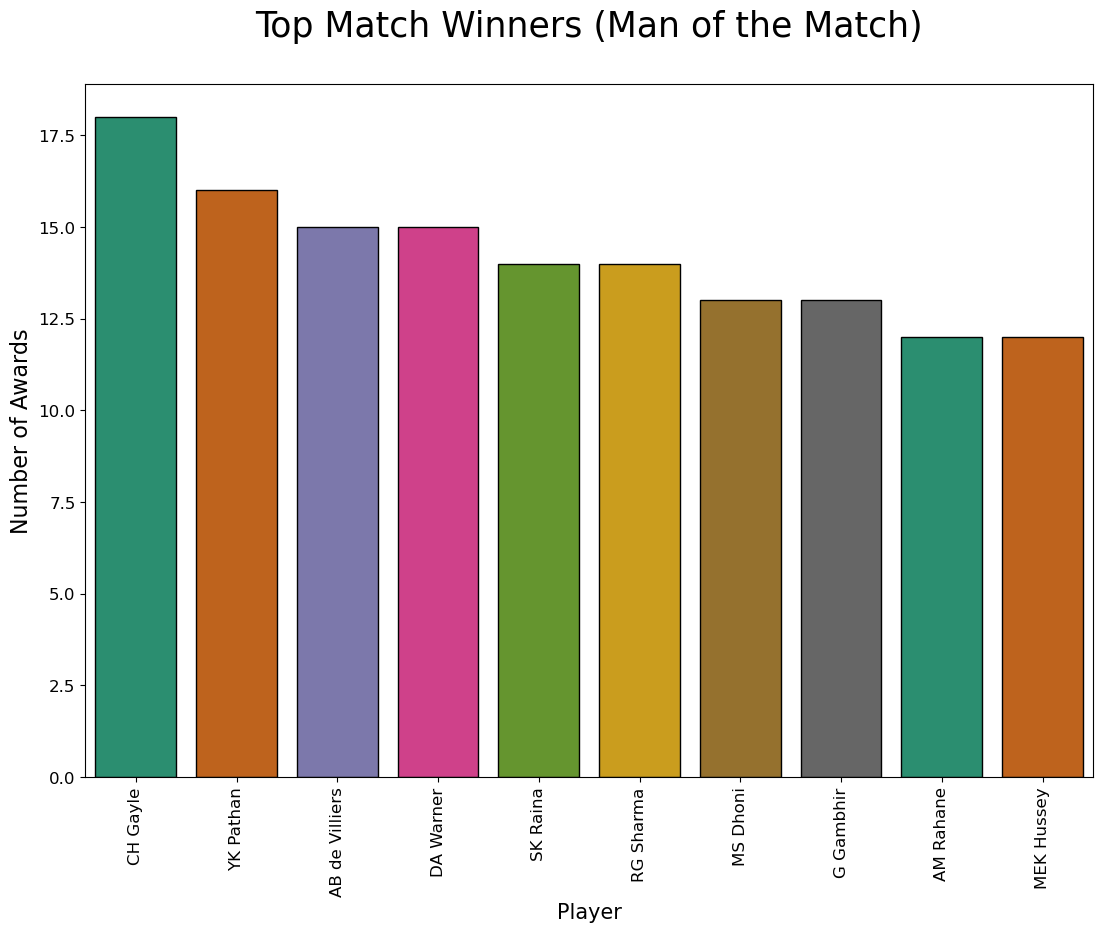

In [13]:
most_mom = m_data['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns = ['Player', 'No. of Awards']

plt.figure(figsize=(13,9))

sns.barplot(x=most_mom['Player'], y=most_mom['No. of Awards'], palette='Dark2',
    edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Top Match Winners (Man of the Match)\n', size=25)
plt.ylabel('Number of Awards', size=16)
plt.xlabel('Player', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [14]:
m_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [15]:
d_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [27]:
best_batsman = d_data.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [15]:
m_data.winner.dtype

dtype('O')

 Best Bowlers


In [53]:
d_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [58]:
pd.set_option('display.max_rows', 200)


C:\Users\Shilpa\AppData\Local\Temp\ipykernel_8436\2805587047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  economy_rate=d_data.groupby(['bowler']).sum()


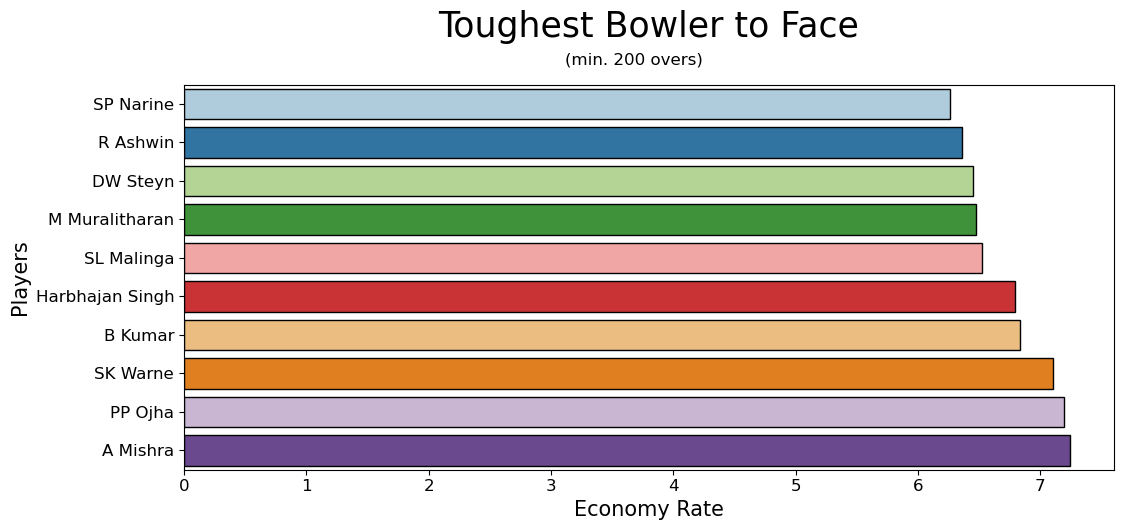

In [62]:
economy_rate=d_data.groupby(['bowler']).sum()

economy_rate['over'] = d_data['bowler'].value_counts()/6

economy_rate['runs'] = economy_rate['wide_runs'] + economy_rate['noball_runs'] 
+ economy_rate['batsman_runs']
 
economy_rate = economy_rate[economy_rate['over'] >= 200]
economy_rate['rate'] = economy_rate['runs']/economy_rate['over']
economy_rate = economy_rate.sort_values(by=['rate'], ascending=True).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=economy_rate['rate'], y=economy_rate.index, palette='Paired',
              edgecolor='black')
plt.title('Toughest Bowler to Face\n', size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Players', size=15)
plt.xlabel('Economy Rate', size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [64]:
d_data['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

C:\Users\Shilpa\AppData\Local\Temp\ipykernel_8436\4108334681.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  venue = venue.pivot('venue','winner')


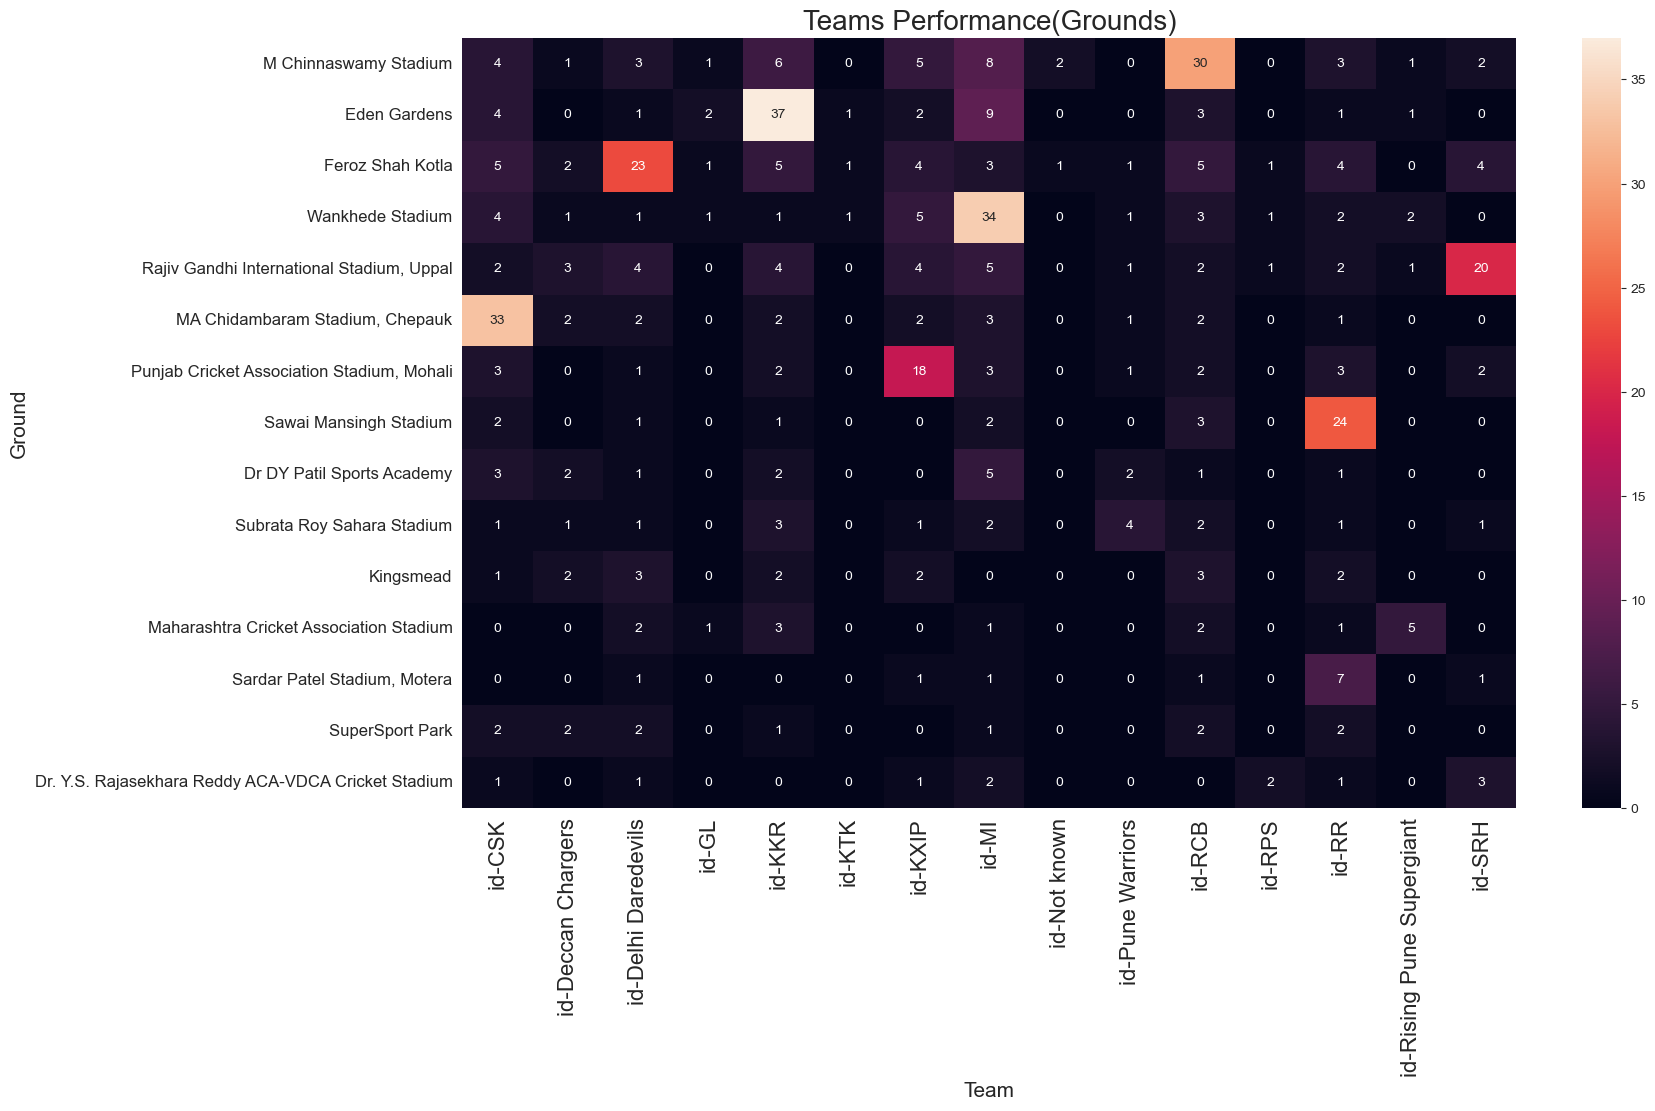

In [92]:
venue = m_data.groupby(['venue','winner']).count()
venue = venue.iloc[:,:1].reset_index()
venue = venue.pivot('venue','winner')
#venue
venue.fillna(0,inplace=True)
venue['total'] = venue.sum(axis=1,skipna=False)
venue['total']
venue = venue.sort_values(by=['total'], ascending=False).head(15)

venue.drop(['total'], axis=1, inplace=True)

sns.set_style('dark')
plt.figure(figsize=(17,10))
sns.heatmap(data=venue, annot=True, cmap='rocket')
plt.xlabel('Team', size=15)
plt.ylabel('Ground', size=15)
plt.yticks(size=12)
plt.xticks(size=16)
plt.title('Teams Performance(Grounds)', size=20)
plt.show()

Many Teams such as MI, KKR and CSK are very strong at their home ground ,So Home Ground advantage is very crucial for Most of the Teams.